In [1]:
import os, sys
path_to_package = os.path.abspath(os.path.join('../'))
if path_to_package not in sys.path:
    sys.path.append(path_to_package)


from src.io import read_phenotypes_file
import matplotlib.pyplot as plt

In [2]:
ORIGINAL_DATA_PATH = "/home/khaldrem/code/sc_regmod/dataset/original"
PHENOTYPE_FILEPATH = "/home/khaldrem/code/sc_regmod/dataset/phenotypes/clean_phenotypes.csv"

In [3]:
phenotype_df = read_phenotypes_file(PHENOTYPE_FILEPATH)

In [4]:
phenotype_df.head()

,Standard,Haploide-Diploide,SM300-Efficiency,SM300-Rate,SM300-Lag,SM300-AUC,SM60-Efficiency,SM60-Rate,SM60-Lag,SM60-AUC,Ratio-Efficiency,Ratio-Rate,Ratio-Lag,Ratio-AUC,Ecological info
0,AAB,haploide-euploide,0.4400,0.01612,9.220,9.497,0.4115,0.01132,10.390,6.954,0.935227,0.702233,1.126898,0.732231,Domesticated (non-wine)
1,AAD,---,1.0620,0.03776,6.062,25.590,0.6657,0.02605,7.240,15.840,0.626836,0.689883,1.194325,0.618992,Domesticated (non-wine)
2,AAE,haploide-euploide,0.9033,0.03103,9.111,18.860,0.6704,0.01607,6.166,12.300,0.742168,0.517886,0.676764,0.652174,Domesticated (wine)
3,AAG,haploide-euploide,0.5714,0.02492,13.140,11.470,0.3127,0.01012,9.617,6.117,0.547252,0.406100,0.731887,0.533304,Unknown
4,AAH,haploide-euploide,1.1170,0.02765,22.390,8.306,0.7819,0.02157,13.020,11.530,0.700000,0.780108,0.581510,1.388153,Unknown


In [5]:
def barplot(data, colors, xlabel, ylabel):
    plt.rc('xtick', labelsize=18) 
    plt.rc('ytick', labelsize=18) 

    plt.figure(figsize=(20, 10))
    plt.bar(data.keys(), data.values(),color=colors)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)

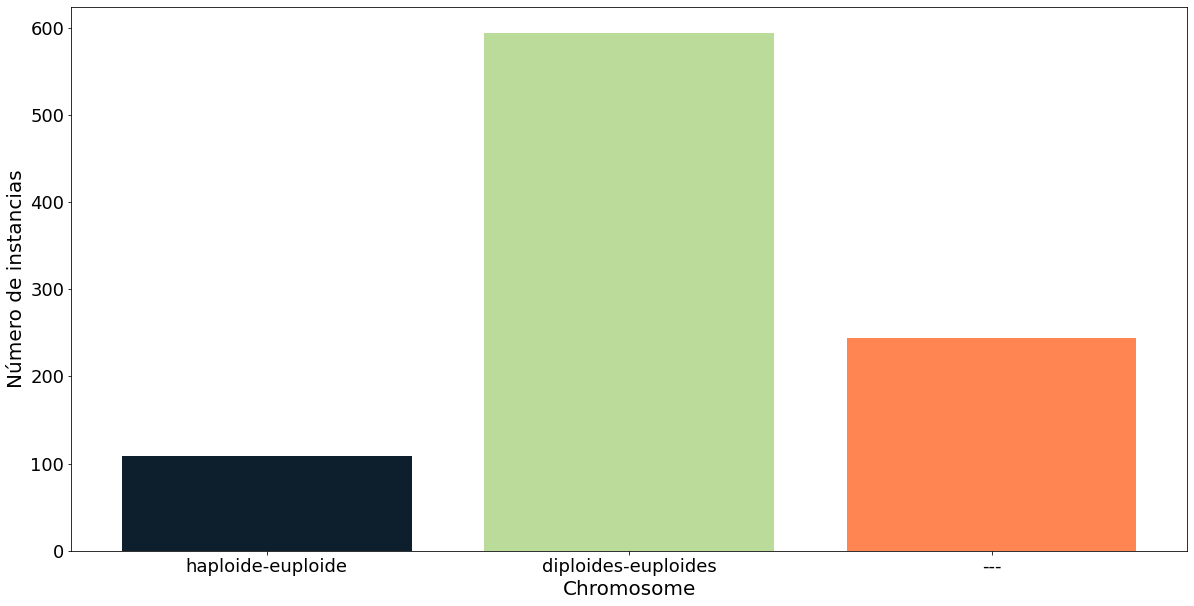

In [6]:
chromosome = {
    "haploide-euploide": phenotype_df[phenotype_df["Haploide-Diploide"] == "haploide-euploide"].count()[0],
    "diploides-euploides": phenotype_df[phenotype_df["Haploide-Diploide"] == "diploides-euploides"].count()[0],
    "---": phenotype_df[phenotype_df["Haploide-Diploide"] == "---"].count()[0]
}

barplot(data=chromosome, colors=["#0D1F2D", "#BBDB9B", "#FF8552"], xlabel="Chromosome", ylabel="Número de instancias")

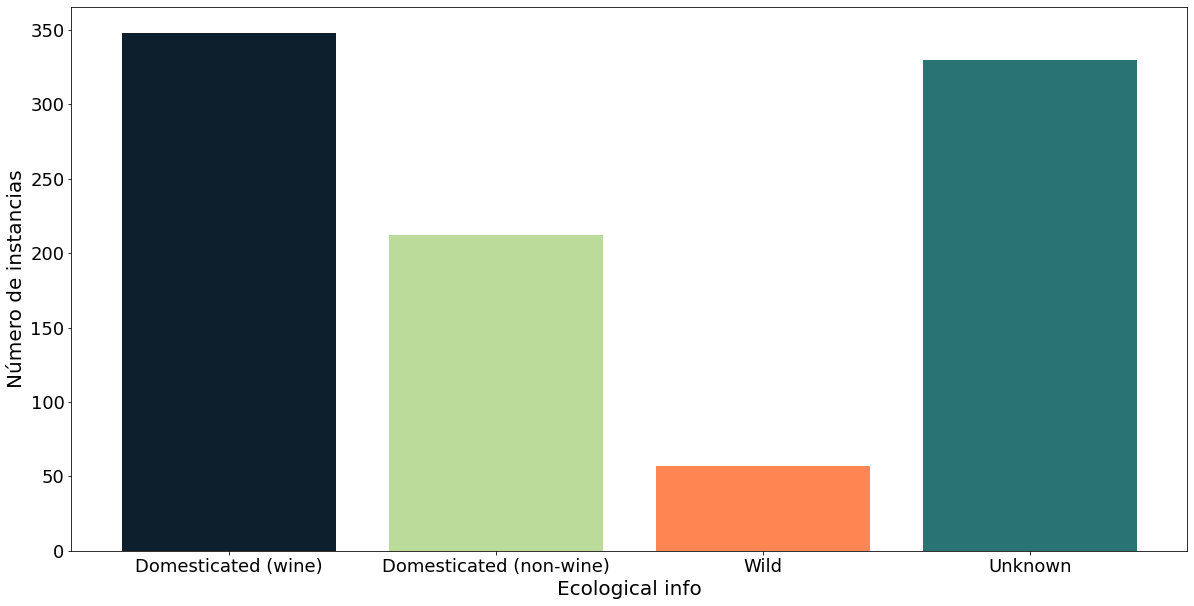

In [7]:
ecological = {}

set_eco = set(phenotype_df["Ecological info"])

for key in set_eco:
    ecological[key] = phenotype_df[phenotype_df["Ecological info"] == key].count()[0]

barplot(data=ecological, colors=["#0D1F2D", "#BBDB9B", "#FF8552", "#297373"], xlabel="Ecological info", ylabel="Número de instancias")

In [8]:
def boxplot(data, xlabel, ylabel):
    plt.rc('xtick', labelsize=18) 
    plt.rc('ytick', labelsize=18) 

    plt.figure(figsize=(15, 10))
    plt.boxplot(data.values())
    plt.xticks([1, 2, 3], ['SM300', 'SM60', 'Ratio'])

    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)

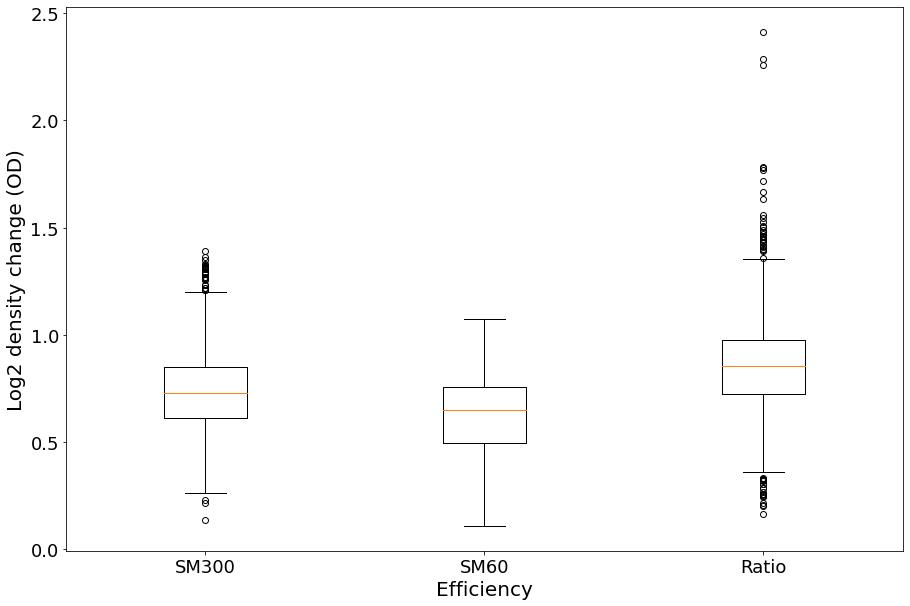

In [9]:
efficiency = {}

efficiency["SM300"] = phenotype_df["SM300-Efficiency"].to_list()
efficiency["SM60"] = phenotype_df["SM60-Efficiency"].to_list()
efficiency["Ratio"] = phenotype_df["Ratio-Efficiency"].to_list()

boxplot(efficiency, "Efficiency", "Log2 density change (OD)")

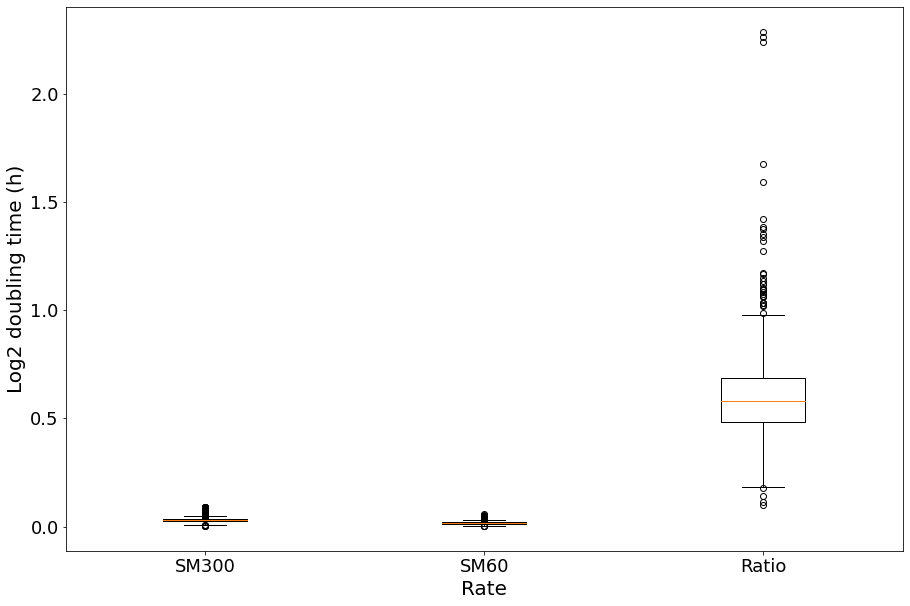

In [10]:
rate = {}

rate["SM300"] = phenotype_df["SM300-Rate"].to_list()
rate["SM60"] = phenotype_df["SM60-Rate"].to_list()
rate["Ratio"] = phenotype_df["Ratio-Rate"].to_list()

boxplot(rate, "Rate", "Log2 doubling time (h)")

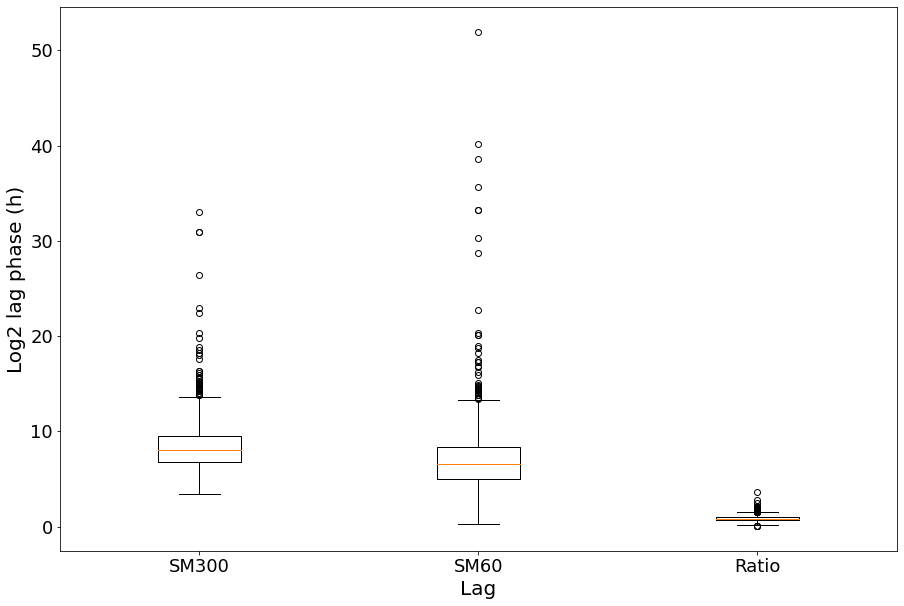

In [11]:
lag = {}

lag["SM300"] = phenotype_df["SM300-Lag"].to_list()
lag["SM60"] = phenotype_df["SM60-Lag"].to_list()
lag["Ratio"] = phenotype_df["Ratio-Lag"].to_list()

boxplot(lag, "Lag", "Log2 lag phase (h)")

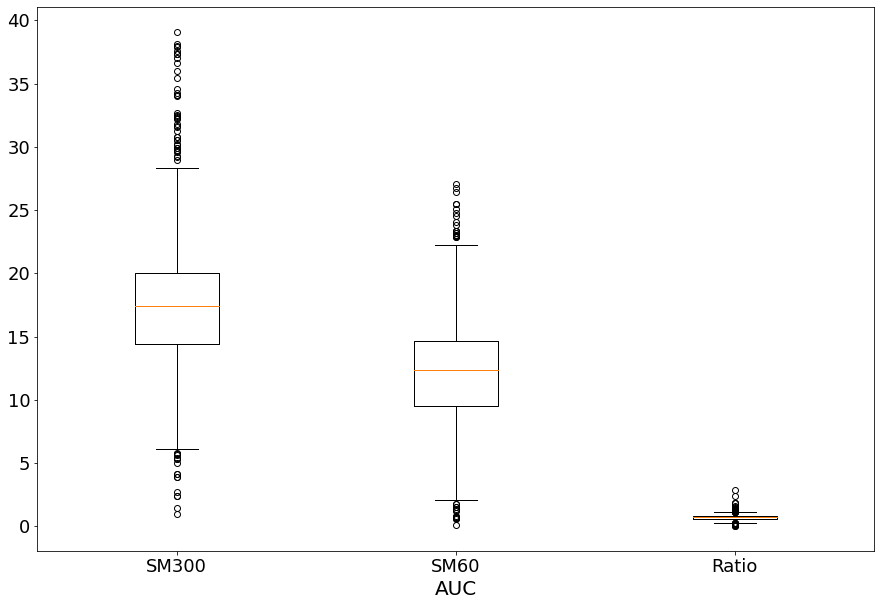

In [13]:
auc = {}

auc["SM300"] = phenotype_df["SM300-AUC"].to_list()
auc["SM60"] = phenotype_df["SM60-AUC"].to_list()
auc["Ratio"] = phenotype_df["Ratio-AUC"].to_list()

boxplot(auc, "AUC", "")